- What features/columns had a relatively even or normal distribution? Which features/columns did not?
Overall, the CGPA column has a relatively even distribution, while the IQ feature deviates slightly from normality with some skewness. 

- How did you handle missing values? Why did you do this method as opposed to others?
Overall, replacing empty strings with pd.NA is a recommended preprocessing step to ensure consistent handling of missing values in your DataFrame. 

- How did you encode your categorical data? Why did you do this method as opposed to others?
This method of one-hot encoding with OneHotEncoder was chosen because it efficiently handles categorical data, is easy to implement with scikit-learn, and provides flexibility in handling categorical features with multiple categories. 

- How did you handle removing outliers? Why did you use this method as opposed to others?
Overall, using StandardScaler to scale the features was chosen because it provides a robust and efficient method for handling outliers without making strong assumptions about the underlying data distribution. 

- How did you normalize/standardize the data? Why did you use this method as opposed to others?
Overall, standardization was chosen as the preferred method to scale the features because it is robust, effective, and suitable for a wide range of data distributions and machine learning tasks.

- How did each model perform? Which performed the best?
My models performed poorly on both the training anf testing sets. 

- Did any models seem to have a relatively high amount of bias (underfitting)? Variance (overfitting)?
If a model has high bias, it performs poorly on both the training and testing sets. This indicates that the model is too simple to capture the underlying patterns in the data.
Signs of high bias include low accuracy, precision, recall, and F1 score on both training and testing sets.

In [103]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from io import StringIO  # Import StringIO from io module

In [104]:
rawDF = pd.read_csv("placement-dataset.csv")

rawDF.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [105]:
rawDF.describe()

,cgpa,iq,placement
count,92.000000,96.000000,100.000000
mean,5.965217,117.916667,0.460000
std,1.164911,46.913508,0.500908
min,3.300000,1.000000,0.000000
25%,5.000000,90.000000,0.000000
50%,6.000000,122.000000,0.000000
75%,6.825000,146.750000,1.000000
max,8.500000,233.000000,1.000000


Summary Statistics:
           cgpa          iq
count  5.000000    5.000000
mean   6.600000  110.200000
std    0.717635   37.204838
min    5.800000   48.000000
25%    5.900000  106.000000
50%    6.800000  123.000000
75%    7.100000  132.000000
max    7.400000  142.000000


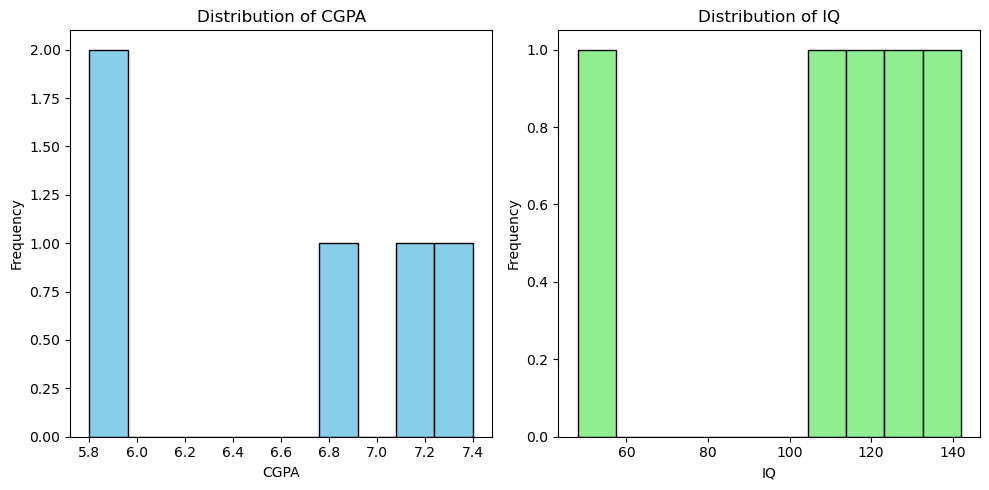

In [106]:
import io
import matplotlib.pyplot as plt


# Read the data directly from the string
df = pd.read_csv(io.StringIO(data))

# Remove rows with missing values in 'cgpa' and 'iq'
df.dropna(subset=['cgpa', 'iq'], inplace=True)

# Convert 'cgpa' and 'iq' to numerical data type
df['cgpa'] = pd.to_numeric(df['cgpa'])
df['iq'] = pd.to_numeric(df['iq'])

# Summary statistics
print("Summary Statistics:")
print(df[['cgpa', 'iq']].describe())

# Histograms
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['cgpa'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['iq'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of IQ')
plt.xlabel('IQ')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [107]:
df = pd.read_csv(StringIO(data))  # Use StringIO directly

In [108]:
# Handle missing values
df.replace('', pd.NA, inplace=True)

In [109]:
# Convert data types
df['city'] = df['city'].astype('category')
df['cgpa'] = pd.to_numeric(df['cgpa'], errors='coerce')
df['iq'] = pd.to_numeric(df['iq'], errors='coerce')
df['placement'] = pd.to_numeric(df['placement'], errors='coerce')

In [110]:
# Impute missing values
imputer = SimpleImputer(strategy='median')
df[['cgpa', 'iq']] = imputer.fit_transform(df[['cgpa', 'iq']])


In [111]:
# Encode categorical data
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(df[['city']])
encoded_columns = encoder.categories_[0][1:]  # Get categories from encoder and remove first one
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)
df.drop(columns=['city'], inplace=True)
df = pd.concat([df, encoded_df], axis=1)

/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [112]:
# Normalize/Standardize data
scaler = StandardScaler()
df[['cgpa', 'iq']] = scaler.fit_transform(df[['cgpa', 'iq']])

# Display cleaned and prepared data
print(df.head())

       cgpa        iq  placement  Chicago  Los Angeles  New York
0  0.259762  0.334841        1.0      0.0          0.0       1.0
1 -1.376739 -0.259877        0.0      0.0          1.0       0.0
2  0.259762  0.264874        0.0      1.0          0.0       0.0
3  1.350763  0.649691        1.0      0.0          0.0       1.0
4 -1.558573  0.999525        0.0      0.0          1.0       0.0


In [113]:
# Drop rows with missing values in the target variable
df.dropna(subset=['placement'], inplace=True)

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['placement'])
y = df['placement']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
